
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 4 - Function Approximators Part 2: Deep Q Network </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Task environments </a>
* <a href='#1.2'> 1.2 Learning Objectives </a>
* <a href='#1.3'> 1.3 Code Structure & Files </a>
* <a href='#1.4'> 1.4 Execution time </a>
* <a href='#2.'> 2. A (not-so-)deep Q-network</a>
* <a href='#3.'> 3. Submitting </a>
* <a href='#3.1'> 3.1 Feedback </a>

<a href='#T1'><b>Student Task 1.</b> Implementing DQN (10 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> Considering Continuous Action Spaces (5 points) </a>\
<a href='#Q2'><b>Student Question 1.2</b> Continuous Action Spaces Part 1 (15 points) </a>\
<a href='#Q3'><b>Student Question 1.3</b> The Target Network (10 points) </a>
 

**Total Points:** 40

# 0. Notes for myself
### [Reinforcement learning (DQN) tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
1. Huber loss is used instead of MSE loss: </br>

> The Huber loss acts like the mean squared error (MSE) when the error is small, but like the mean absolute error (MAE) when the error is large - this makes it more robust to outliers when the estimates of $Q$ are very noisy. 


### [What does the gather function do in pytorch in layman terms?](https://stackoverflow.com/questions/50999977/what-does-the-gather-function-do-in-pytorch-in-layman-terms)

### policy net and target net

1. policy net: estimate current Q-value, $Q(s_j, a_j)$ 
2. target net: estimate target Q-value, $r_j + \gamma \cdot \max_{a}\left(\hat{Q}(s_{j+1}, a)\right)$

update every $C$ steps: $\hat{Q} = Q$

# 1. Introduction <a id='1.'></a>

In various real-world scenarios, dealing with high-dimensional state spaces makes it impractical to compute and store Q-values for every possible state-action pair in a Q-table. To address this challenge, we turn to function approximators. In this assignment, you will progress creating a basic Deep Q-Network (DQN) in the **Cartpole** and **LunarLander** environment.

**Please start working on this assignment early since the DQN will take some time to train.**


<div style="display:flex">
     <div style="flex:1;padding-left:100px;">
          <img src="imgs/cartpole.png" width="300"/>
         <figcaption style="flex:1;padding-left:20px;">  Figure 1: The Cartpole environment. </figcaption>
     </div>
     <div style="flex:1;padding-left:70px;">
          <img src="imgs/lunar_lander.png" width="300"/>
         <figcaption style="flex:1;padding-left:20px;">  Figure 2: The Lunarlander environment. </figcaption>
     </div>

</div>

Useful Sources:

- Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013). https://arxiv.org/pdf/1312.5602.pdf


## 1.1 Task environments: <a id='1.1'></a>
In this excercise, we will mainly use DQN for two tasks:
- Cartpole(https://gymnasium.farama.org/environments/classic_control/cart_pole/): This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

- Lunar Lander (https://gymnasium.farama.org/environments/box2d/lunar_lander/): This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

## 1.2 Learning Objectives: <a id='1.1'></a>
- Understand why and how function approximators can be used for Q-learning
- Understand the Deep Q-Network RL algorithm

## 1.3 Code Structure & Files <a id='1.2'></a>

```ex4_dqn.ipynb``` is the file needed to be modified for this part of the assignment.  

<span style="color:red"> **# IMPORTANT: DO NOT FORGET ANOTHER TASK IN ```ex4_rbf.ipynb```** </span>

```
├───cfg                            # Config files for environments
├───imgs                           # Images used in notebook
├───results
│   └───CartPole-v1
│   │   ├───logging                
│   │   │    └───logging.pkl        # Contains logged data
│   │   ├───model              
│   │   │    └───*dqn.pt            # Contains trained model
│   │   └───video                   # Videos saved
│   │   └───*cartpole_dqn.png       # Contains training performance plot
│   └───LunarLander-v2
│   │   ├───logging                
│   │   │    └───logging.pkl        # Contains logged data
│   │   ├───model              
│   │   │    └───*dqn.pt            # Contains trained model
│   │   └───video                   # Videos saved
│   │   └───*lunarlander_dqn.png    # Contains training performance plot
│   ex4_dqn.ipynb                   # 2nd assignment file containing tasks <---------This task
│   ex4_rbf.ipynb                   # 1st assignment file containing tasks <---------
│   train.py                        # Contains train and test functions 
│   utils.py                        # Contains useful functions 
└───buffer.py                       # Contains buffer functions
```

## 1.4 Execution time <a id='1.4'></a>

The training of these methods might take more than 40 mins depends on the server. If you have problem of experiment running takes too much time, you can download the jupyter notebook and test it locally.

# 2. A (not-so-)deep Q-network <a id='2.'></a>

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing DQN (10 points) </h3> 

Finish the incomplete code in DQNAgent (functions ```update``` and ```get_action```, marked with ```TODO```) to implement a DQN agent.

**See Figure 3 for an example training performance plot for cartpole. Save the training performance plots, and check if they are in the right place (the paths please refer to <a href='#3.'>Submitting<a>).**

<figure style="text-align: center">
<img src="imgs/dqn.png" width="300px">
<figcaption style="text-align: center"> Figure 3: The training performance plot for cartpole-dqn might look something like this. </figcaption>
</figure>
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


### Training performance plots I got
<figure>
<img src="results/CartPole-v1/cartpole_dqn.png" width="400px">
<figcaption style="text-align: center"> The training performance plot for cartpole-dqn I got. </figcaption>
</figure>
<figure>
<img src="results/LunarLander-v2/lunarlander_dqn.png" width="400px">
<figcaption style="text-align: center"> The training performance plot for lunarlander-dqn I got.</figcaption>
</figure>

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from typing import List
import numpy as np
import torch, random, copy, yaml, time
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from pathlib import Path

import utils as u
import train as t

from IPython.display import Video # to display videos

device = 'cpu'

In [2]:
def mlp(in_dim, mlp_dims: List[int], out_dim, act_fn=nn.ReLU, out_act=nn.Identity):
    """Returns an MLP."""
    if isinstance(mlp_dims, int): raise ValueError("mlp dimensions should be list, but got int.")

    layers = [nn.Linear(in_dim, mlp_dims[0]), act_fn()]
    for i in range(len(mlp_dims)-1):
        layers += [nn.Linear(mlp_dims[i], mlp_dims[i+1]), act_fn()]
    # the output layer
    layers += [nn.Linear(mlp_dims[-1], out_dim), out_act()]
    return nn.Sequential(*layers)

In [3]:
class DQNAgent(object):
    def __init__(self, state_shape, n_actions,
                 batch_size=32, hidden_dims=[12], gamma=0.98, lr=1e-3, grad_clip_norm=1000, tau=0.001):
        self.n_actions = n_actions
        self.state_dim = state_shape[0]
        self.policy_net = mlp(self.state_dim, hidden_dims, n_actions).to(device)
        self.target_net = copy.deepcopy(self.policy_net)
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=float(lr))

        self.batch_size = batch_size
        self.gamma = gamma
        self.grad_clip_norm = grad_clip_norm
        self.tau = tau
        
        self.counter = 0

    def update(self, buffer):
        """ One gradient step, update the policy net."""
        start = time.perf_counter()
        self.counter += 1
        # Do one step gradient update
        batch = buffer.sample(self.batch_size, device=device)
        # Hint:
        #    state = batch.state
        #    action = batch.action 
        #    next_state = batch.next_state
        #    reward = batch.reward 
        #    not_done = batch.not_done 
        
        # TODO: Task 3: Finish the DQN implementation.
        # Hints: 1. You can use torch.gather() to gather values along an axis specified by dim. 
        #        2. torch.max returns a namedtuple (values, indices) where values is the maximum 
        #           value of each row of the input tensor in the given dimension dim.
        #           And indices is the index location of each maximum value found (argmax).
        #        3.  batch is a namedtuple, which has state, action, next_state, not_done, reward
        #           you can access the value be batch.<name>, e.g, batch.state
        #        4. check torch.nn.utils.clip_grad_norm_() to know how to clip grad norm
        #        5. You can go throught the PyTorch Tutorial given on MyCourses if you are not familiar with it. 
        # calculate the q(s,a)
        ########## You code starts here #########
        
        # 0. given minibatch of transitions based on batch 
        # 1. compute Q(s_j, a_j)
        # `gather(dim=1, index=state)`:  for each sample, gather value of specified state.
        state_action_values = self.policy_net(batch.state).gather(1, batch.action.long()) 
        
        # 2. compute V(s_{j+1}) for all next states.
        # mask to determine if s_j is the final state or not
        # by testing, this implementation will be faster than the map-based method presented in the tutorial 
        non_final_mask = batch.not_done.bool()
        final_mask = ~non_final_mask # 
        # compute V(s_{j+1}) for all next states 
        next_state_values = torch.max(self.target_net(batch.next_state), dim=1).values.unsqueeze(1)
        next_state_values[final_mask] = 0
        
        # 3. compute the expected Q values 
        expected_state_action_values = batch.reward + self.gamma * next_state_values
        
        # 4. compute mse loss
        criterion = nn.MSELoss() # reduction: mean
        loss = criterion(state_action_values, expected_state_action_values)
        
        # 5. optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        # in-place gradient clipping, to mitigate exploding gradients
        nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()
            
        ########## You code ends here #########

        # update the target network
        u.soft_update_params(self.policy_net, self.target_net, self.tau)
        
        end = time.perf_counter()
        update_time = end - start
        return {'loss': loss.item(), 
                'q_mean': expected_state_action_values.mean().item(),
                'num_update': self.counter,
                'update_time': update_time}


    # NOTE no grad required for action
    @torch.no_grad()
    def get_action(self, state, epsilon=0.05):
        # TODO:  Task 3: implement epsilon-greedy action selection
        ########## You code starts here #########
        u = np.random.random()
        state = torch.from_numpy(state)
        if u > epsilon: 
            action = torch.argmax(self.policy_net(state)).item()
        else: 
            action = torch.randint(0, self.n_actions, (1,), dtype=int).item()
        ########## You code ends here #########
        return action


    def save(self, fp):
        path = fp/'dqn.pt'
        torch.save({
            'policy': self.policy_net.state_dict(),
            'policy_target': self.target_net.state_dict()
        }, path)

    def load(self, fp):
        path = fp/'dqn.pt'
        d = torch.load(path)
        self.policy_net.load_state_dict(d['policy'])
        self.target_net.load_state_dict(d['policy_target'])

In [4]:
# init agent
with open(Path().cwd()/'cfg'/'cartpole_dqn.yaml', 'r') as f:
    cfg = t.Struct(**yaml.safe_load(f))
    
agent = DQNAgent(state_shape=cfg.state_shape, n_actions=cfg.n_actions, batch_size=cfg.batch_size, hidden_dims=cfg.hidden_dims,
                 gamma=cfg.gamma, lr=cfg.lr, tau=cfg.tau)

In [5]:
# Trainig takes approximately 40 mins,depends on server
t.train(agent,  cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml',) 

Numpy/Torch/Random Seed:  436
{'ep_reward': 18.0, 'episode': 0, 'epsilon': 1.0, 'ep_avr': 0.002592712640762329, 'ts_avr': 0.00012214502526654137}
{'ep_reward': 12.0, 'episode': 100, 'epsilon': 0.6666666666666666, 'ep_avr': 0.022848412804305555, 'ts_avr': 0.0011476091290983396, 'loss': 0.6559486389160156, 'q_mean': 1.487979531288147, 'num_update': 1768, 'update_time': 0.0009693242609500885}
{'ep_reward': 17.0, 'episode': 200, 'epsilon': 0.5, 'ep_avr': 0.0196464579179883, 'ts_avr': 0.0012744804644561419, 'loss': 0.5357875823974609, 'q_mean': 2.4460344314575195, 'num_update': 3307, 'update_time': 0.0009650737047195435}
{'ep_reward': 10.0, 'episode': 300, 'epsilon': 0.4, 'ep_avr': 0.017084268480539323, 'ts_avr': 0.0013687834622006546, 'loss': 0.8416765928268433, 'q_mean': 3.352484941482544, 'num_update': 4553, 'update_time': 0.0009639561176300049}
{'ep_reward': 18.0, 'episode': 400, 'epsilon': 0.3333333333333333, 'ep_avr': 0.017251707352697848, 'ts_avr': 0.001383372641591183, 'loss': 1.007

{'ep_reward': 200.0, 'episode': 3400, 'epsilon': 0.05555555555555555, 'ep_avr': 0.23400851242244244, 'ts_avr': 0.0011695049315690995, 'loss': 0.004094510804861784, 'q_mean': 98.692626953125, 'num_update': 381567, 'update_time': 0.0009602978825569153}
{'ep_reward': 200.0, 'episode': 3500, 'epsilon': 0.05405405405405406, 'ep_avr': 0.23253281269222498, 'ts_avr': 0.0011621516903862357, 'loss': 0.027340443804860115, 'q_mean': 97.22257995605469, 'num_update': 401567, 'update_time': 0.0009705200791358948}
{'ep_reward': 200.0, 'episode': 3600, 'epsilon': 0.05263157894736842, 'ep_avr': 0.23157506112009288, 'ts_avr': 0.0011573499917984008, 'loss': 0.021923236548900604, 'q_mean': 97.4524154663086, 'num_update': 421567, 'update_time': 0.0009760670363903046}
{'ep_reward': 200.0, 'episode': 3700, 'epsilon': 0.05128205128205128, 'ep_avr': 0.23035792358219623, 'ts_avr': 0.001179517034908206, 'loss': 0.06829990446567535, 'q_mean': 97.41984558105469, 'num_update': 441088, 'update_time': 0.00096040219068

Numpy/Torch/Random Seed:  436


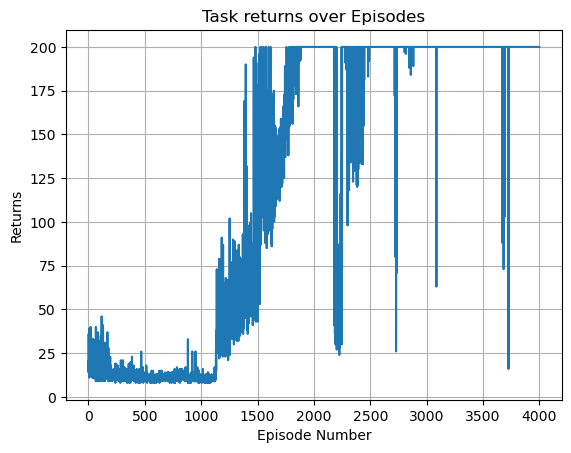

In [6]:
# Visualize the DQN training plots for the cartpole task
t.plot(save_name='cartpole_dqn.png', cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml',)

In [7]:
t.test(agent, cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml', cfg_args=dict(save_video=True))

Numpy/Torch/Random Seed:  436


error: XDG_RUNTIME_DIR not set in the environment.


{'episode': 0, 'ep_reward': 200.0}
{'episode': 1, 'ep_reward': 200.0}
{'episode': 2, 'ep_reward': 200.0}
{'episode': 3, 'ep_reward': 200.0}
{'episode': 4, 'ep_reward': 200.0}
{'episode': 5, 'ep_reward': 200.0}
{'episode': 6, 'ep_reward': 200.0}
{'episode': 7, 'ep_reward': 200.0}
{'episode': 8, 'ep_reward': 200.0}
{'episode': 9, 'ep_reward': 200.0}


In [8]:
Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex4_dqn-episode-9.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

In [9]:
# init agent
with open(Path().cwd()/'cfg'/'lunarlander_dqn.yaml', 'r') as f:
    cfg = t.Struct(**yaml.safe_load(f))
    
agent = DQNAgent(state_shape=cfg.state_shape, n_actions=cfg.n_actions, batch_size=cfg.batch_size, hidden_dims=cfg.hidden_dims,
                 gamma=cfg.gamma, lr=cfg.lr, tau=cfg.tau)

In [10]:
# Trainig takes approximately 60 mins,depends on server
t.train(agent, cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict()) 

Numpy/Torch/Random Seed:  436
{'ep_reward': -489.08022834697204, 'episode': 0, 'epsilon': 1.0, 'ep_avr': 0.01500418409705162, 'ts_avr': 0.00011701661607493525}
{'ep_reward': -154.45575037013953, 'episode': 100, 'epsilon': 0.6666666666666666, 'ep_avr': 0.21272124864161016, 'ts_avr': 0.0019643704089579465, 'loss': 27.776859283447266, 'q_mean': -10.064733505249023, 'num_update': 9981, 'update_time': 0.0020054765045642853}
{'ep_reward': -13.37975108053071, 'episode': 200, 'epsilon': 0.5, 'ep_avr': 0.40657139252871277, 'ts_avr': 0.002112967335870403, 'loss': 14.9912109375, 'q_mean': -7.065962314605713, 'num_update': 29195, 'update_time': 0.0019054785370826721}
{'ep_reward': 69.00590836008824, 'episode': 300, 'epsilon': 0.4, 'ep_avr': 0.6525714273750782, 'ts_avr': 0.0021045870140219427, 'loss': 9.034385681152344, 'q_mean': 1.586045742034912, 'num_update': 60172, 'update_time': 0.0017243213951587677}
{'ep_reward': 10.002263200800641, 'episode': 400, 'epsilon': 0.3333333333333333, 'ep_avr': 0.

Numpy/Torch/Random Seed:  436


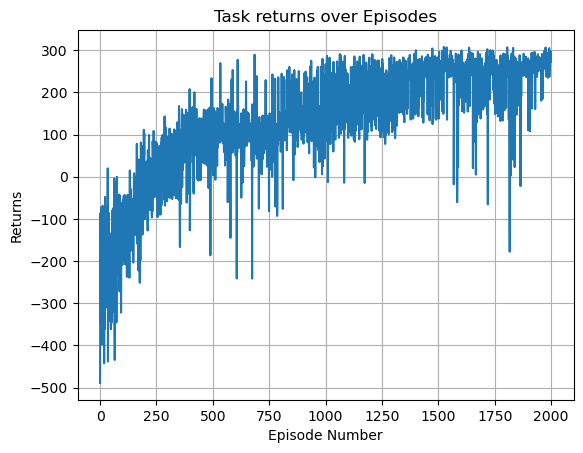

In [11]:
# Visualize the DQN training plots for the lunarlander task
t.plot(save_name='lunarlander_dqn.png', cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict())

In [12]:
t.test(agent, cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict(save_video=True))

Numpy/Torch/Random Seed:  436
{'episode': 0, 'ep_reward': 290.1270265065841}
{'episode': 1, 'ep_reward': 272.7290723291328}
{'episode': 2, 'ep_reward': 291.50858870267933}
{'episode': 3, 'ep_reward': 301.45779154667525}
{'episode': 4, 'ep_reward': 264.0151599180497}
{'episode': 5, 'ep_reward': 297.12570718572147}
{'episode': 6, 'ep_reward': 285.49152792074506}
{'episode': 7, 'ep_reward': 179.84399162177476}
{'episode': 8, 'ep_reward': 294.6343321962571}
{'episode': 9, 'ep_reward': 263.55918976486305}


In [3]:
Video(Path().cwd()/'results'/'LunarLander-v2'/'video'/'test'/'ex4_dqn-episode-8.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Considering Continuous Action Spaces (5 points) </h3> 

Can Q-learning be used directly in environments with continuous action spaces?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


**One sentence**: the basic Q-learning cannot be directly applied to environments with continuous action spaces; to generalize, some techniques such as function approximation or discretization should be used.

**Details**

Q-learning is designed for discrete environment: a Q-table is maintained for each state-action pair.

Two techniques to generalize out of discrete action spaces: </br>
- function approximation: instead of using Q-table, we use a parametric approximation function as the policy (and/or) Q functions. e.g. Proximal policy optimization (PPO)
- discretization: divide the continuous action spaces into finite number of discrete actions. 

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.2</b> Continuous Action Spaces Part 1 (15 points) </h3> 

1.Which steps of the algorithm would be difficult to compute in case of a continuous action space?
    
2.If any, what could be done to solve them?
    
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


**Exploration**: 

- in discreate action space, we can explore by randomly selecting an action, which is infeasible for a continuous space with infinite actions.
- solution: add noise to selected action. 

**Action selection**: 

- in discrete action space, we can easily select the action with the highest Q-values. This is not feasible in continuous space. 
- solution: we can use a parameterized policy (e.g. neural networks, linear function) to output continuous actions based on the current state.

**Q-value update**:

- In discrete action spaces, we update each state-action pair, which is not feasible when it comes to a continous action space.
- solution: use appoximated Q functions to estimate Q-values. 

Furthermore, some algorithm (e.g.PPO) only approximates the optimal policy without forming an approximated value function, then there is no need to bother with the Q-values-related issues mentioned above.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.3</b> The Target Network (10 points) </h3> 

In DQN, we use an additional target network to calculate the target Q value.
    
1.Why we need an additional target network ? 
    
2.Can we just use the same network (no an additional target network ) in calculating both Q(s,a) and maxa(Q(s′,·))? why or why not?
    
3.What will happen if we do not stop gradient of the target Q value?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


**Why we need an addtional target network?**

The DQN is essentially a supervised learning method, the training can be instable and hard to converge when the target keeps changing. Keeping the target network for $C$ steps improves stability. 

**Can we just use the same network (no an additional target network ) in calculating both $Q(s,a)$ and $max_a(Q(s′,\cdot))$? why or why not?**

In the 'real' Deep Q-learning algorithm, no. Since we are updating the policy net per step, the target $max_a(Q(s′,\cdot))$ will also keep changing all the time if we use only one network, and this can lead to instability as we just mentioned. 

In this implementation, however, we can actually use the same network since $C = 1$: we compute the MSE loss between the target $max_a(\hat{Q}(s′,\cdot))$ and $Q(s, a)$, perform a gradient descent step, and then update $\hat{Q} = Q$ for every step. This makes policy net $Q$ and target net $\hat{Q}$ always the same, then of course we can just use the same network. I guess that is the reason why the title for this task is *a (not-so)-deep Q-network*?

**What will happen if we do not stop gradient of the target Q value?**

the policy net and the target net will be optimized simultaneously, then we get two essentially identical nets. The target network setting will be meaningless.

# 3. Submitting <a id='3.'></a>
Ensure all tasks and questions (in ```ex4_dpn.ipynb``` and ```ex4_rbf.ipynb```) are answered and and that the necessary plots are saved in the appropriate locations. The relevant plots and files needed to be submitted for this assignment are:


- Training performance plots:
  - `cartpole_dqn.png`: Cartpole, training performance plots in terms of episode and episodic reward
  - `lunarlander_dqn.png`: Lunarlander, training performance plots in terms of episode and episodic reward 
<br>
<br>

  

- Model files:
  - `dqn.pt`: Trained model


Ensure the model files and plots are saved in correct paths:
- ```results/CartPole-v1/cartpole_dqn``` Training result for Cartpole environment
- ```results/CartPole-v1/model/dqn.pt``` Model for Cartpole environment
- ```results/LunarLander-v2/lunarlander_dqn.png``` Training result for LunarLander environment
- ```results/LunarLander-v2/model/dqn.pt``` Model for LunarLander environment


<span style="color:red"> **# IMPORTANT: DO NOT FORGET ANOTHER TASK IN ```ex4_rbf.ipynb```** </span>

## 3.1 Feedback <a id='3.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)

In [ ]:
hrs = 5

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1 = 4   # Implementing DQN (10 points)
Q1_1 = 3 # Question 1.1 Considering Continuous Action Spaces (5 points)
Q1_2 = 3 # Question 1.2 Continuous Action Spaces Part 1 (15 points)
Q1_3 = 3 # Question 1.3 The Target Network (10 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1 = 5   # Implementing DQN (10 points)
Q1_1 = 5 # Question 1.1 Considering Continuous Action Spaces (5 points)
Q1_2 = 5 # Question 1.2 Continuous Action Spaces Part 1 (15 points)
Q1_3 = 5 # Question 1.3 The Target Network (10 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
Please share any additional feedback, suggestions, or comments you have about the lecture, assignment, or course content. Your input is valuable in helping us improve the learning experience.

- The content of the lecture relates well with the assignment; the DQN algorithm in the lecture slide is a good reference.
- I find it quite useful. First of all, DQN is an interesting topic; the code template is well designed with good hints; and the question parts are also enlightening. 
- Additional feedback: </br>
it would make the subtasks clearer and save some time on finding out the correct variable names and data type if some additional information about the name, data type and shape of function arguments and returns is provided. For example, the `get_action()` function here is supposed to return a `int`/`long` result; and `q_mean` in the `update()` function refers to the average of batch Q target values.